# O-mode LFS/HFS

This is not the best diagnostic. Not even by a longshot. But it is the most honest by several parsecs.

## Reading and plotting the data

In [3]:
from ipfnpytools.getsig import getsig
from ipfnpytools.closest import closest
import matplotlib.pyplot as plt
plt.style.use('./Styles/darklab.mplstyle')

In [17]:
shotnr = 30554
nelfs = getsig(shotnr, 'RPS', 'neb_LFS')
nehfs = getsig(shotnr, 'RPS', 'neb_HFS')

#Separatrix positions
rin = getsig(shotnr, 'GQH', 'Rin')
raus = getsig(shotnr, 'GQH', 'Raus')

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:118: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(err_txt, RuntimeWarning)


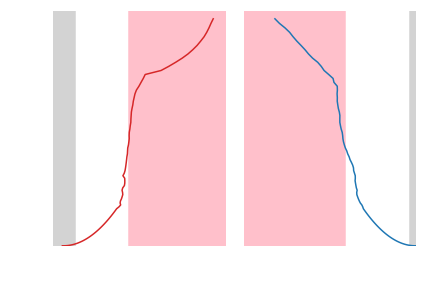

In [29]:
time = 1.1
tind = closest(nelfs.time, time)

fig, ax = plt.subplots(ncols=2, sharey=True)

ax[0].plot(nehfs.area.data[tind, :], nehfs.data[tind, :]*1e-19, color='C3')

ax[1].plot(nelfs.area.data[tind, :], nelfs.data[tind, :]*1e-19, color='C0')

#labels & text
ax[0].set_ylabel(r'$\mathrm{n_{e}\,[10^{19}\,m^{-3}]}$')
ax[0].set_xlabel('HFS R [m]')
ax[1].set_xlabel('LFS R [m]')
ax[1].set_ylim(0, 2.2)
ax[0].text(1.05, 1.5, 'inner wall', rotation=270)
ax[1].text(2.21, 1.5, 'ICRH limiter', rotation=90, ha='left')

#Inner vessel wall
ax[0].axvspan(1.0, 1.045, color='#D3D3D3')
#ICRH limiter
ax[1].axvspan(2.22, 2.23, color='#D3D3D3')

#Readjust X axis
ax[0].set_xlim(1.0, 1.35)
ax[1].set_xlim(1.98, 2.23)

#Separatrices
rinr = rin.data[closest(rin.time, time)]
ax[0].axvspan(rinr, 1.35, color='#FFC0CB')

rausr = raus.data[closest(raus.time, time)]
ax[1].axvspan(1.98, rausr, color='#FFC0CB')

plt.tight_layout()
plt.show()

## Magnetic equilibrium

In [33]:
import dd #To read 
import kk_abock
import numpy as np

In [34]:
eq = kk_abock.kk()
eq.Open(shotnr, diag='EQH')

#Get the antenna Z
rps = dd.shotfile('RPS', shotnr)
zl = rps.getParameter('AuxInfo', 'z_lfs')
zh = rps.getParameter('AuxInfo', 'z_hfs') 
rps.close()

In [35]:
rhol = eq.Rz_to_rhopol(time, nelfs.area.data[tind,:], np.ones_like(nelfs.area.data[tind,:])*zl.data)
rhoh = eq.Rz_to_rhopol(time, nehfs.area.data[tind,:], np.ones_like(nehfs.area.data[tind,:])*zh.data)

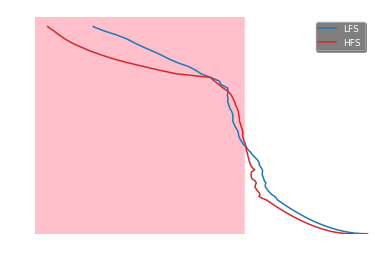

In [39]:
plt.plot(rhol, nelfs.data[tind,:],'C0',label='LFS')
plt.plot(rhoh, nehfs.data[tind,:],'C3',label='HFS')
plt.axvspan(0.75,1.0, color='#FFC0CB')

plt.xlim(0.75, 1.15)
plt.ylim(bottom=0)

plt.xlabel(r'$\mathrm{\rho_{pol}}$')
plt.legend()
plt.show() 

## RDL shotfile

To easily plot density layers on cview you have the RDL shotfile. The shotfile header and code to write it are stored on the RDL directory. If you want to produce them, ask R. Merkel for your user to have permissions to create it. You can run it from the command line by doing:

`python write_RDL.py #####`

If you need to run it, than you are probably more than smart enough to figure out how it works.

A good way to exemplify the usefulness of RDL is to compare it against second separatrix data.

In [4]:
import matplotlib.pyplot as plt
from ipfnpytools.getsig import getsig
from ipfnpytools.rhosep2 import rhosep2
from scipy.signal import medfilt
import numpy as np
plt.style.use('./Styles/darklab.mplstyle')

In [6]:
shotnr = 36597
nbi = getsig(shotnr, 'NIS', 'PNI')
ecs = getsig(shotnr, 'ECS', 'PECRH')
h5 = getsig(shotnr, 'DCN', 'H-5')
hfsr = getsig(shotnr, 'RDL', 'HFSR')
hfsrho = getsig(shotnr, 'RDL', 'HFSRHO')
dtot = getsig(shotnr, 'UVS', 'D_tot')
ntot = getsig(shotnr, 'UVS', 'N_tot')

#You need to define a time base to use rhosep2
tsep2 = np.linspace(1,7,6000)
rsep2 = rhosep2(shotnr, tsep2)

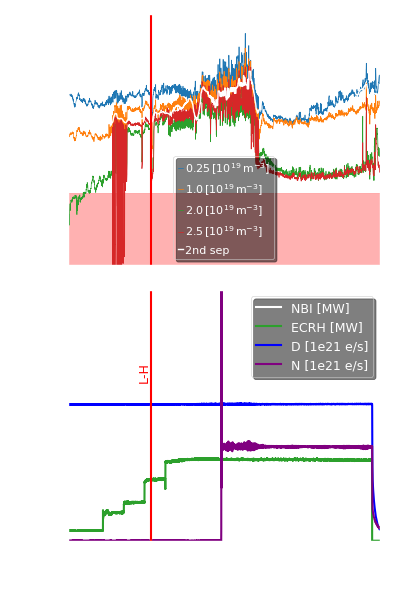

In [17]:
fig, ax = plt.subplots(dpi=100, figsize=(4,6), nrows=2, sharex=True)

ax[0].plot(hfsrho.time, medfilt(hfsrho.data[:,0], 25), label=r'$\mathrm{0.25\,[10^{19}\,m^{-3}]}$', lw=0.5)
ax[0].plot(hfsrho.time, medfilt(hfsrho.data[:,3], 25), label=r'$\mathrm{1.0\,[10^{19}\,m^{-3}]}$', lw=0.5)
ax[0].plot(hfsrho.time, medfilt(hfsrho.data[:,7], 25), label=r'$\mathrm{2.0\,[10^{19}\,m^{-3}]}$', lw=0.5)
ax[0].plot(hfsrho.time, medfilt(hfsrho.data[:,9], 25), label=r'$\mathrm{2.5\,[10^{19}\,m^{-3}]}$', lw=0.5)
ax[0].plot(tsep2, medfilt(rsep2, 55), lw=1, label='2nd sep', c='w')
ax[0].set_ylim(0.98,1.05)
ax[0].set_xlim(2,6.5)
ax[0].text(2.2, 1.045, '#36597')
ax[0].legend(loc='lower center', fontsize=8, handlelength=0.5, handletextpad=0.1)

ax[0].set_ylabel(r'$\mathrm{\rho_{pol}}$')
ax[0].axhspan(0.97, 1.0, color='r', alpha=0.3)

ax[1].plot(nbi.time, nbi.data*1e-6, label='NBI [MW]', color='w')
ax[1].plot(ecs.time, ecs.data*1e-6, label='ECRH [MW]', color='C2')
ax[1].plot(dtot.time, dtot.data*1e-21, label='D [1e21 e/s]', color='b')
ax[1].plot(ntot.time, ntot.data*1e-21, label='N [1e21 e/s]', color='purple')
ax[1].legend(loc='best', fontsize=9)
ax[1].set_ylim(0,5.2)

ax[1].set_xlabel('time [s]')
ax[0].axvline(3.2, color='r')
ax[1].axvline(3.2, color='r')
ax[1].text(3.1, 3.5, 'L-H', ha='center', va='center', rotation=90, color='r')

plt.tight_layout()
#plt.savefig('./Images/second_sep_36597.png', dpi=300)
plt.show()